In [871]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [872]:
df=pd.read_csv("/kaggle/input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [873]:
test=pd.read_csv("/kaggle/input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [874]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()                 
df["Sex"]=label_encoder.fit_transform(df["Sex"])
df["Embarked"]=label_encoder.fit_transform(df["Embarked"])
test["Sex"]=label_encoder.fit_transform(test["Sex"])
test["Embarked"]=label_encoder.fit_transform(test["Embarked"])
df 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


In [875]:
df.shape

(891, 12)

In [876]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [877]:
df.drop(["Cabin","Name","Ticket","PassengerId"],axis=1,inplace=True)
test.drop(["Cabin","Name","Ticket","PassengerId"],axis=1,inplace=True)

df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [878]:
df["Embarked"].value_counts()

Embarked
2    644
0    168
1     77
3      2
Name: count, dtype: int64

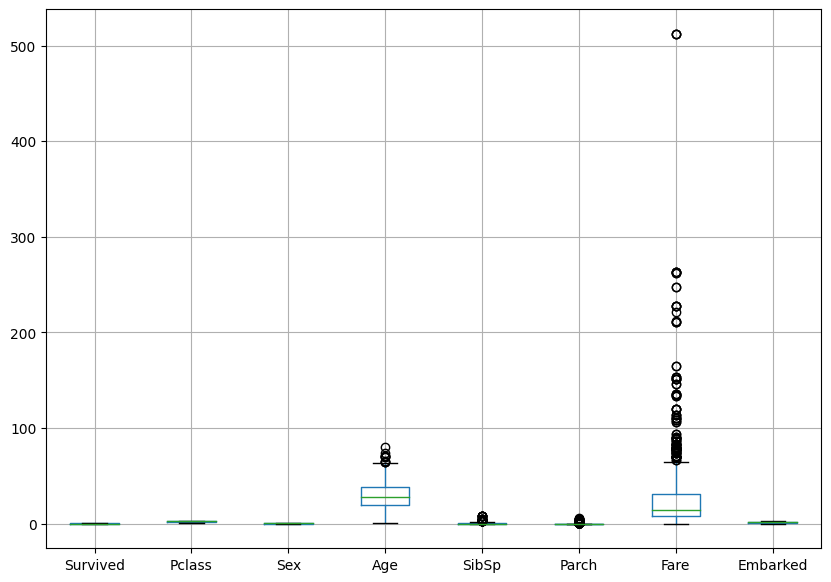

In [879]:

fig = plt.figure(figsize =(10, 7))
 

df.boxplot(figsize=(10, 7))
plt.show()

In [880]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [881]:
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [882]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [883]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
test["Embarked"] = test["Embarked"].fillna(test["Embarked"].mode()[0])


In [884]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [885]:
df["Age"]=df["Age"].fillna(df["Age"].median())
df.isnull().sum()
test["Age"]=test["Age"].fillna(test["Age"].median())
test.isnull().sum()


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [886]:
selected_rows = df[df['Age'] > 38]
selected_rows

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
6,0,1,1,54.0,0,0,51.8625,2
11,1,1,0,58.0,0,0,26.5500,2
13,0,3,1,39.0,1,5,31.2750,2
15,1,2,0,55.0,0,0,16.0000,2
30,0,1,1,40.0,0,0,27.7208,0
...,...,...,...,...,...,...,...,...
865,1,2,0,42.0,0,0,13.0000,2
871,1,1,0,47.0,1,1,52.5542,2
873,0,3,1,47.0,0,0,9.0000,2
879,1,1,0,56.0,0,1,83.1583,0


In [887]:
from sklearn.preprocessing import MinMaxScaler

# Create the StandardScaler instance and fit it on the 'Age' column
scaler = MinMaxScaler()
df[['Age']] = scaler.fit_transform(df[['Age']])
df[['Fare']] = scaler.fit_transform(df[['Fare']])



test[['Age']] = scaler.fit_transform(test[['Age']])
test[['Fare']] = scaler.fit_transform(test[['Fare']])



In [888]:
df.drop(["Survived"],axis=1,inplace=True)
x=df

In [889]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.452723,0,0,0.015282,1
1,3,0,0.617566,1,0,0.013663,2
2,2,1,0.815377,0,0,0.018909,1
3,3,1,0.353818,0,0,0.016908,2
4,3,0,0.287881,1,1,0.023984,2
...,...,...,...,...,...,...,...
413,3,1,0.353818,0,0,0.015713,2
414,1,0,0.512066,0,0,0.212559,0
415,3,1,0.505473,0,0,0.014151,2
416,3,1,0.353818,0,0,0.015713,2


In [890]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [891]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

<Axes: >

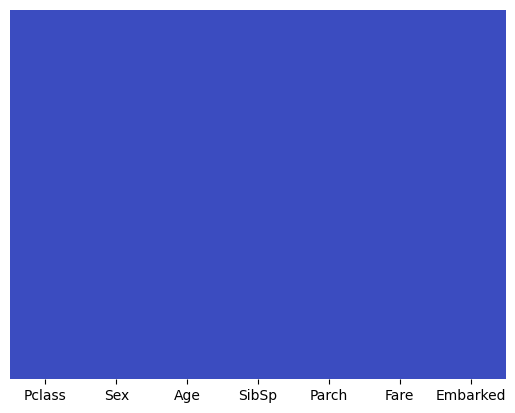

In [892]:
import seaborn as sns

# Create a heatmap to visualize missing values in x_train
sns.heatmap(x_train.isnull(), yticklabels=False, cbar=False,cmap="coolwarm")


In [893]:
model.score(x_test,y_test)

0.7653631284916201

In [894]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7932960893854749


In [895]:
predictions= model.predict(test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
